In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,FunctionTransformer,PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, recall_score,f1_score,precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



#LOAD THE DATASET

df=pd.read_csv("Student.csv")


#UNDERSTAND AND EXPLORE THE DATA

df.head()
df.shape
df.columns
df.isnull().sum()
df.isnull().mean()*100

#BASIC CLEANING

df['dropout_next_semester'].value_counts()
df['attendance_rate']=df['attendance_rate'].clip(0,100)
df['gender']=df['gender'].replace({'M':'Male', 'F': 'Female'})

df['gender'].value_counts()
df.describe()


#FILL MISSING VALUE

num_cols=df.select_dtypes(include=['int64','float64']).columns
cat_cols=df.select_dtypes(include=['object']).columns

df[num_cols]=SimpleImputer(strategy='median').fit_transform(df[num_cols])
df[cat_cols]=SimpleImputer(strategy='most_frequent').fit_transform(df[cat_cols])

df[num_cols].skew()


#DATA DISTRIBUTION

X=df.drop('dropout_next_semester',axis=1)
y=df['dropout_next_semester']

X=pd.get_dummies(X,drop_first=True)

#TRAIN THE MODEL.

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

model=LogisticRegression(max_iter=3000, class_weight='balanced')
model.fit(X_train,y_train)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))

print("Confusion_matrix:",confusion_matrix(y_test,y_pred))

print("Classification_report:", classification_report(y_test,y_pred))


coef=pd.Series(model.coef_[0],index=X.columns)
coef.sort_values(ascending=False)
coef.head()

df.to_csv("Student_cleaned.csv",index=False)




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy Score: 0.7704166666666666
Confusion_matrix: [[1116  337]
 [ 214  733]]
Classification_report:               precision    recall  f1-score   support

         0.0       0.84      0.77      0.80      1453
         1.0       0.69      0.77      0.73       947

    accuracy                           0.77      2400
   macro avg       0.76      0.77      0.76      2400
weighted avg       0.78      0.77      0.77      2400



VISUALIZE THE DATA


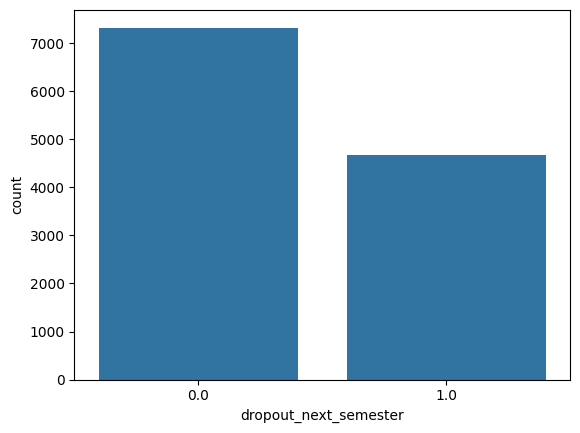

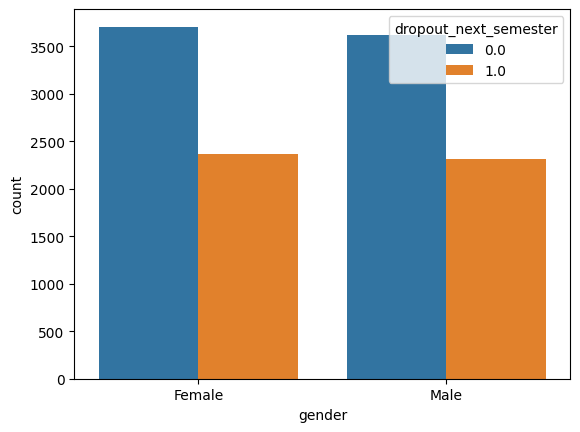

In [100]:
sns.countplot(x='dropout_next_semester',data=df)
plt.show()

sns.countplot(x='gender',hue='dropout_next_semester',data=df)
plt.show()






Work on clean Dataset


In [20]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,FunctionTransformer,PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, recall_score,f1_score,precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



df=pd.read_csv("Student_cleaned.csv")

df.drop(columns=['attendance_trend', 'gpa_change','student_id'], inplace=True)

df['age_group']=df['age_group'].replace({'18-20':1,'24+': 3, '21-23': 2}).astype(int)
df['lms_login_per_week']=df['lms_login_per_week'].clip(0,10)

X=df.drop(columns=['dropout_next_semester'])
y=df['dropout_next_semester']


num_cols=X.select_dtypes(include=['int64','float64']).columns
cat_cols=X.select_dtypes(include=['object']).columns

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

num_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

])

cat_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(drop='first', handle_unknown='ignore'))
])


preprocessor=ColumnTransformer(transformers=[
    ('num',num_pipeline,num_cols),
    ('cat',cat_pipeline,cat_cols)
])

model=Pipeline([
    ('preprocessor',preprocessor),
    ('model',LogisticRegression(max_iter=1000, class_weight='balanced'))
])

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print('Confusion_Matrix', confusion_matrix(y_test,y_pred))
print('Classification_Report', classification_report(y_test,y_pred))

X_train[num_cols].skew()

scores=cross_val_score(model,X,y,cv=5,scoring='f1')
print(f"The Cross_Val score: {scores.mean()*100:.2f}%")

features_columns=X.columns
num_features=num_cols.tolist()
cat_features=cat_cols.tolist()


user_input={}

print("Enter Student Details Below:\n")
for col in features_columns:
  if col in num_features:
    user_input[col]=float(input(f"Enter {col}: "))
  else:
    user_input[col]=input(f"Enter {col}: ")
user_input_df=pd.DataFrame([user_input])

prediction=model.predict(user_input_df)
probability=model.predict_proba(user_input_df)


print("----Predictio Result----\n")
if prediction[0]==1:
  print("Student will dropout next semester")
else:
  print("Student will not dropout next semester")
print(f"dropout Probability: {probability[0][1]*100:.2f}%")


Accuracy Score: 0.7566666666666667
Confusion_Matrix [[1102  351]
 [ 233  714]]
Classification_Report               precision    recall  f1-score   support

         0.0       0.83      0.76      0.79      1453
         1.0       0.67      0.75      0.71       947

    accuracy                           0.76      2400
   macro avg       0.75      0.76      0.75      2400
weighted avg       0.76      0.76      0.76      2400

The Cross_Val score: 71.16%
Enter Student Details Below:

Enter age_group: 2
Enter gender: Male
Enter first_gen_student: 0
Enter scholarship: 0
Enter current_gpa: 5.9
Enter prev_gpa: 4.33
Enter attendance_rate: 94
Enter assignment_missed: 4
Enter avg_submission_delay_days: 7
Enter lms_login_per_week: 6
Enter family_income_band: High
Enter hostel_resident: 1
Enter working_part_time: 0
Enter semester: 3
----Predictio Result----

Student will not dropout next semester
dropout Probability: 48.64%
